In [15]:
%reload_ext autoreload
%autoreload 2

import os.path
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PARENT_DIR = r'D:\projects\diverters\src'
CURR_DIR = os.path.join(PARENT_DIR, 'analysis_v2')
sys.path.append(PARENT_DIR)

from analysis_v2.solve import solve_fixed
from analysis_v2 import config
from parametric_solver.solver import NodeContext
from linearization import surface

In [11]:
solver = solve_fixed()

press_bound_df = pd.read_csv(os.path.join(PARENT_DIR, 'inp', 'nodes', 'press_bound.loc'), index_col=0)
press_bound_nodes = press_bound_df.index.to_numpy()

Adding sample: low, 100, 5 ...
Adding sample: low, 100, 10 ...
Adding sample: low, 100, 15 ...
Adding sample: low, 100, 20 ...
Adding sample: low, 100, 25 ...
Adding sample: low, 100, 30 ...
Adding sample: low, 100, 35 ...
Adding sample: low, 100, 40 ...
Adding sample: low, 100, 45 ...
Adding sample: low, 100, 50 ...
Adding sample: nominal, 100, 5 ...
Adding sample: nominal, 100, 10 ...
Adding sample: nominal, 100, 15 ...
Adding sample: nominal, 100, 20 ...
Adding sample: nominal, 100, 25 ...
Adding sample: nominal, 100, 30 ...
Adding sample: nominal, 100, 35 ...
Adding sample: nominal, 100, 40 ...
Adding sample: nominal, 100, 45 ...
Adding sample: nominal, 100, 50 ...
Adding sample: high, 70, 5 ...
Adding sample: high, 90, 5 ...
Adding sample: high, 100, 5 ...
Adding sample: high, 70, 10 ...
Adding sample: high, 90, 10 ...
Adding sample: high, 100, 10 ...
Adding sample: high, 70, 15 ...
Adding sample: high, 90, 15 ...
Adding sample: high, 100, 15 ...
Adding sample: high, 70, 20 ...
Ad

In [28]:
def eval_stresses(case, yield_frac, hardening_percents):
    max_eqv_stress = []
    max_lin_stress = []
    max_lin_strain = []

    for hardening_percent in hardening_percents:
        name = f"{case}_{yield_frac}_{hardening_percent}_exp"
        print(name)
        result = solver.result_from_name(name)

        max_eqv_stress.append(result.max_eqv_stress(press_bound_nodes))
        max_lin_stress.append(result.max_linearized_stresses()['linearized'])
        max_lin_strain.append(result.max_linearized_strains()['linearized'])
        
    return max_eqv_stress, max_lin_stress, max_lin_strain


In [31]:
def init_dict(curr_dict):
    if not case in curr_dict:
        curr_dict[case] = {}


HARDENING_PERCENTS = np.arange(5, 50, 5)

max_eqv_stress = {}
max_lin_stress = {}
max_lin_strain = {}

for case in config.CASES:
    for yield_frac in [0.70, 0.90, 1.00] if case == 'high' else [1.00]:
        yield_percent = int(yield_frac * 100)

        init_dict(max_eqv_stress)
        init_dict(max_lin_stress)
        init_dict(max_lin_strain)

        results = (eval_stresses(case, yield_percent, HARDENING_PERCENTS))
        max_eqv_stress[case][yield_percent] = results[0]
        max_lin_stress[case][yield_percent] = results[1]
        max_lin_strain[case][yield_percent] = results[2]

print(max_eqv_stress)
print(max_lin_stress)

low_100_5_exp
Loading cached result from D:\projects\diverters\src\analysis_v2\out\low_100_5_exp.pkl ...
low_100_10_exp
Loading cached result from D:\projects\diverters\src\analysis_v2\out\low_100_10_exp.pkl ...
low_100_15_exp
Loading cached result from D:\projects\diverters\src\analysis_v2\out\low_100_15_exp.pkl ...
low_100_20_exp
Loading cached result from D:\projects\diverters\src\analysis_v2\out\low_100_20_exp.pkl ...
low_100_25_exp
Loading cached result from D:\projects\diverters\src\analysis_v2\out\low_100_25_exp.pkl ...
low_100_30_exp
Loading cached result from D:\projects\diverters\src\analysis_v2\out\low_100_30_exp.pkl ...
low_100_35_exp
Loading cached result from D:\projects\diverters\src\analysis_v2\out\low_100_35_exp.pkl ...
low_100_40_exp
Loading cached result from D:\projects\diverters\src\analysis_v2\out\low_100_40_exp.pkl ...
low_100_45_exp
Loading cached result from D:\projects\diverters\src\analysis_v2\out\low_100_45_exp.pkl ...
nominal_100_5_exp
Loading cached result

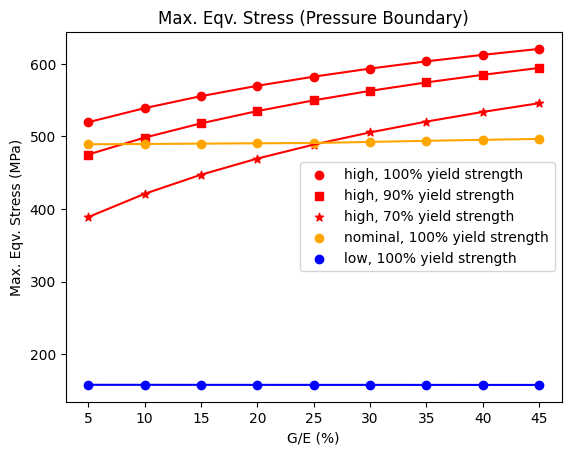

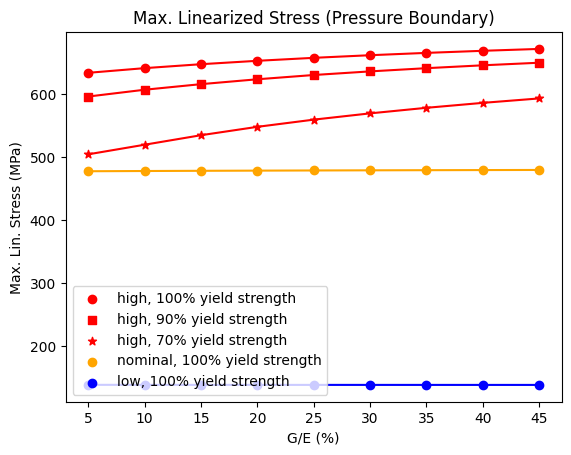

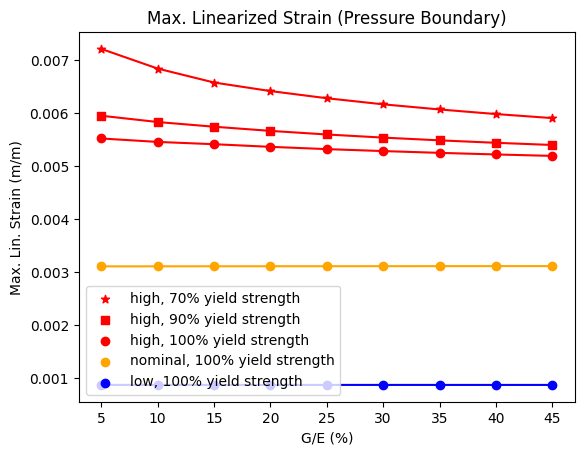

In [51]:
def plot_data(data, title, y_label, strain):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_title(title)
    ax.set_xlabel("G/E (%)")
    ax.set_ylabel(f"{y_label}")

    curr_cases = config.CASES.copy()

    curr_yield_percents = [100, 90, 70]
    if strain:
        curr_yield_percents.reverse()

    for case in curr_cases:
        for yield_percent in curr_yield_percents if case == 'high' else [100]:
            y = data[case][yield_percent]
            marker = {
                100: 'o',
                90: 's',
                70: '*'
            }[yield_percent]
            color = {
                'high': 'red',
                'nominal': 'orange',
                'low': 'blue'
            }[case]
            ax.scatter(HARDENING_PERCENTS, y, label=f"{case}, {yield_percent}% yield strength", marker=marker, color=color)
            ax.plot(HARDENING_PERCENTS, y, color=color)
    
    ax.legend()
    plt.show()


plot_data(max_eqv_stress, "Max. Eqv. Stress (Pressure Boundary)", "Max. Eqv. Stress (MPa)", False)
plot_data(max_lin_stress, "Max. Linearized Stress (Pressure Boundary)", "Max. Lin. Stress (MPa)", False)
plot_data(max_lin_strain, "Max. Linearized Strain (Pressure Boundary)", "Max. Lin. Strain (m/m)", True)

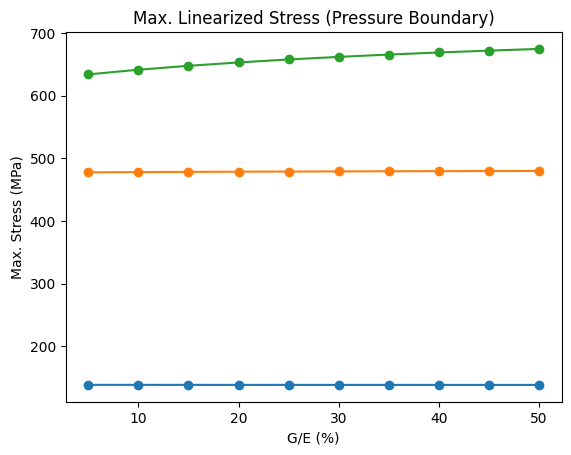

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title("Max. Linearized Stress (Pressure Boundary)")
ax.set_xlabel("G/E (%)")
ax.set_ylabel("Max. Stress (MPa)")

FRACTIONS = list(range(5, 51, 5))

for case in config.CASES:
    ax.plot(FRACTIONS, max_lin_stresses[case], label=case)
    ax.scatter(FRACTIONS, max_lin_stresses[case])

plt.show()

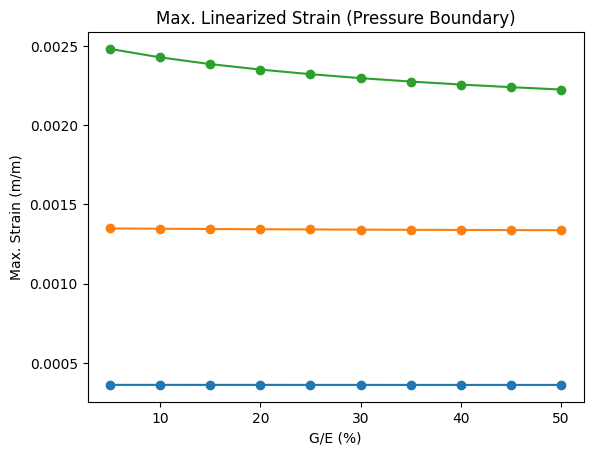

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title("Max. Linearized Strain (Pressure Boundary)")
ax.set_xlabel("G/E (%)")
ax.set_ylabel("Max. Strain (m/m)")

for case in config.CASES:
    ax.plot(FRACTIONS, max_lin_strains[case], label=case)
    ax.scatter(FRACTIONS, max_lin_strains[case])

plt.show()